Import Modules

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import MinMaxScaler
from sklearn.metrics import mean_absolute_percentage_error
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, LSTM

Get Data Set and Display it

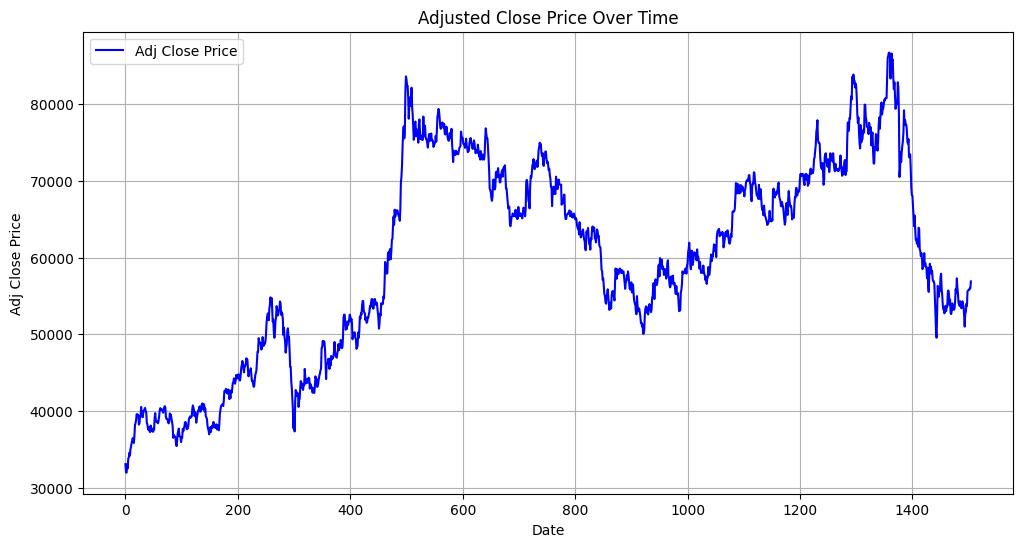

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1505 entries, 0 to 1504
Data columns (total 7 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   Date       1505 non-null   object 
 1   Open       1505 non-null   float64
 2   High       1505 non-null   float64
 3   Low        1505 non-null   float64
 4   Close      1505 non-null   float64
 5   Adj Close  1505 non-null   float64
 6   Volume     1505 non-null   int64  
dtypes: float64(5), int64(1), object(1)
memory usage: 82.4+ KB


In [2]:
data = pd.read_csv("Data/005930.KS.csv")

df = data.copy()

# 3. Plotting the Price Data (using Adj Close as the primary example)
plt.figure(figsize=(12, 6))  # Adjust figure size for better readability
plt.plot(df['Adj Close'], label='Adj Close Price', color='blue')
plt.title('Adjusted Close Price Over Time')
plt.xlabel('Date')
plt.ylabel('Adj Close Price')
plt.grid(True)
plt.legend()
plt.show()

df.dropna(inplace=True)

df.info()

Processing

In [3]:
# Split original dataset into training and test sets while preserving original scale
train_size = int(0.8 * len(data))
train_data_original = data[:train_size]
test_data_original = data[train_size:]

# Scale features and target using MinMaxScaler
scaler_features = MinMaxScaler()
features_scaled = scaler_features.fit_transform(data[['Open', 'High', 'Low', 'Close', 'Volume']])

features = df[['Open', 'High', 'Low', 'Close', 'Volume']]  # Define input features


scaler_target = MinMaxScaler()
target_scaled = scaler_target.fit_transform(data[['Adj Close']])
print("NaN in target_scaled:", np.isnan(target_scaled).sum())  # Check scaled values

# Split scaled data into train and test sets
X_train = features_scaled[:train_size]
X_test = features_scaled[train_size:]
y_train = target_scaled[:train_size]
y_test = target_scaled[train_size:]

NaN in target_scaled: 0


Build Nueral Network

In [4]:
model = Sequential()
model.add(Dense(128, input_dim=features.shape[1], activation='relu'))  # Input layer
model.add(Dense(64, activation='relu'))  # Hidden layer
model.add(Dense(1, activation='linear'))  # Output layer

model.compile(optimizer='adam', loss='mean_squared_error', metrics=['mae'])

c:\Users\ruanl\AppData\Local\Programs\Python\Python310\lib\site-packages\keras\src\layers\core\dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Train Model

In [5]:
model.fit(X_train, y_train, epochs=50, batch_size=8, validation_data=(X_test, y_test))

Epoch 1/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - loss: 0.0361 - mae: 0.1103 - val_loss: 0.0085 - val_mae: 0.0895
Epoch 2/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 7.2732e-04 - mae: 0.0213 - val_loss: 0.0068 - val_mae: 0.0802
Epoch 3/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.3761e-04 - mae: 0.0196 - val_loss: 0.0059 - val_mae: 0.0733
Epoch 4/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7692e-04 - mae: 0.0182 - val_loss: 0.0062 - val_mae: 0.0759
Epoch 5/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.9333e-04 - mae: 0.0188 - val_loss: 0.0065 - val_mae: 0.0780
Epoch 6/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 5.7140e-04 - mae: 0.0180 - val_loss: 0.0054 - val_mae: 0.0704
Epoch 7/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.5895e-04 - mae: 0.0198 - val_loss: 0.0077 - val_mae: 0.0852
Epoch 8/50
151/151 ━━━━━━━━━━━━━━━━━━━━ 0s 1ms/step - loss: 6.1709e-04 - mae: 0.0190 - val_loss: 0.0060 - val_mae: 0.0735
Epoch 9/50
151/151 ━━━━━━━━━

Predict

In [6]:
y_pred = model.predict(X_test)

10/10 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


Evaluate the model

Accuracy: 99.87%


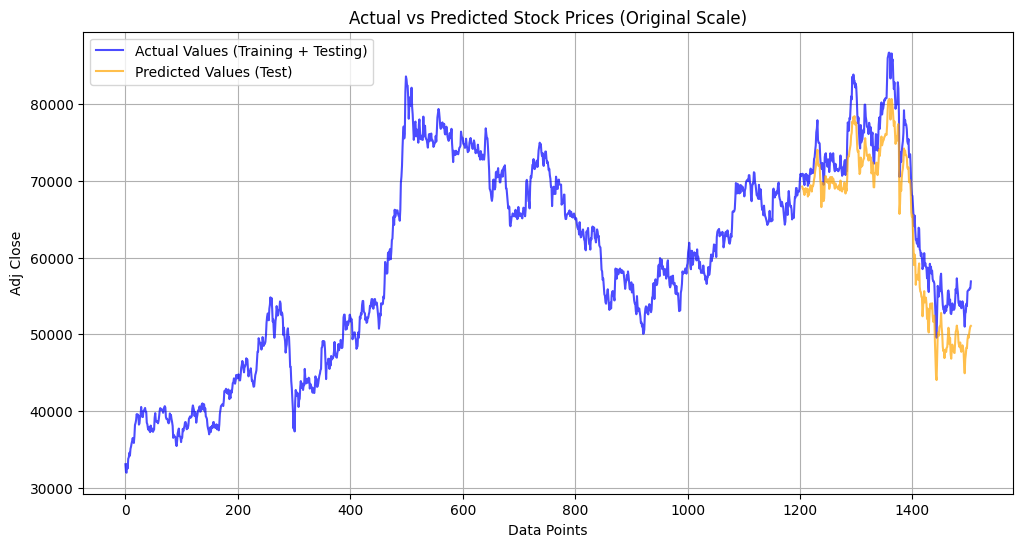

In [7]:
mape = mean_absolute_percentage_error(y_test, y_pred)
print(f'Accuracy: {100 - mape:.2f}%')

# Inverse-transform predictions and actual test values to the original scale
y_pred_original_scale = scaler_target.inverse_transform(y_pred)
y_test_original_scale = scaler_target.inverse_transform(y_test)

# Plot Actual vs Predicted values (aligned with test range)
plt.figure(figsize=(12, 6))
# Plot entire dataset in original scale
plt.plot(range(len(data['Adj Close'])), data['Adj Close'], label="Actual Values (Training + Testing)", color="blue", alpha=0.7)
# Overlay predictions (aligned with test indices)
test_start_index = len(train_data_original)
test_indices = range(test_start_index, test_start_index + len(y_test_original_scale))
plt.plot(test_indices, y_pred_original_scale, label="Predicted Values (Test)", color="orange", alpha=0.7)
plt.xlabel("Data Points")
plt.ylabel("Adj Close")
plt.title("Actual vs Predicted Stock Prices (Original Scale)")
plt.legend()
plt.grid(True)
plt.show()